Berdasarkan NIM dengan berakhiran 2574, angka terakhirnya adalah 4. Maka Anda harus membuat Sistem Penentuan Tingkat Kebahagiaan Pelanggan di Restoran. Sistem ini akan menilai tingkat kebahagiaan pelanggan berdasarkan parameter:

Kecepatan Pelayanan
Kualitas Makanan
Suasana Restoran **bold text**

In [2]:
!pip install scikit-fuzzy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.4 MB/s eta 0:00:00


Hasil Sistem Fuzzy:
- Kecepatan Pelayanan: 35
- Kualitas Makanan: 7
- Suasana Restoran: 8
- Tingkat Kebahagiaan: 8.24


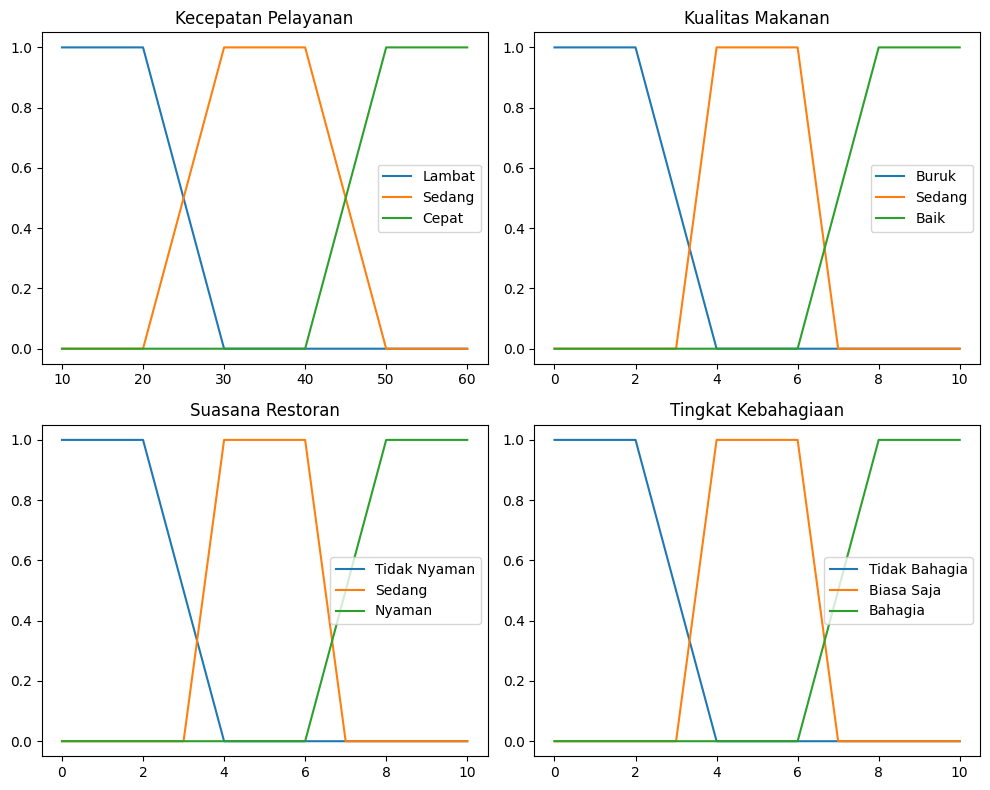

In [14]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Variabel input
kecepatan_pelayanan = ctrl.Antecedent(np.arange(10, 61, 1), 'kecepatan_pelayanan')
kualitas_makanan = ctrl.Antecedent(np.arange(0, 11, 1), 'kualitas_makanan')
suasana_restoran = ctrl.Antecedent(np.arange(0, 11, 1), 'suasana_restoran')

# Variabel output
tingkat_kebahagiaan = ctrl.Consequent(np.arange(0, 11, 1), 'tingkat_kebahagiaan')

# Himpunan fuzzy untuk kecepatan pelayanan
kecepatan_pelayanan['lambat'] = fuzz.trapmf(kecepatan_pelayanan.universe, [10, 10, 20, 30])
kecepatan_pelayanan['sedang'] = fuzz.trapmf(kecepatan_pelayanan.universe, [20, 30, 40, 50])
kecepatan_pelayanan['cepat'] = fuzz.trapmf(kecepatan_pelayanan.universe, [40, 50, 60, 60])

# Himpunan fuzzy untuk kualitas makanan
kualitas_makanan['buruk'] = fuzz.trapmf(kualitas_makanan.universe, [0, 0, 2, 4])
kualitas_makanan['sedang'] = fuzz.trapmf(kualitas_makanan.universe, [3, 4, 6, 7])
kualitas_makanan['baik'] = fuzz.trapmf(kualitas_makanan.universe, [6, 8, 10, 10])

# Himpunan fuzzy untuk suasana restoran
suasana_restoran['tidak nyaman'] = fuzz.trapmf(suasana_restoran.universe, [0, 0, 2, 4])
suasana_restoran['sedang'] = fuzz.trapmf(suasana_restoran.universe, [3, 4, 6, 7])
suasana_restoran['nyaman'] = fuzz.trapmf(suasana_restoran.universe, [6, 8, 10, 10])

# Himpunan fuzzy untuk tingkat kebahagiaan
tingkat_kebahagiaan['tidak bahagia'] = fuzz.trapmf(tingkat_kebahagiaan.universe, [0, 0, 2, 4])
tingkat_kebahagiaan['biasa saja'] = fuzz.trapmf(tingkat_kebahagiaan.universe, [3, 4, 6, 7])
tingkat_kebahagiaan['bahagia'] = fuzz.trapmf(tingkat_kebahagiaan.universe, [6, 8, 10, 10])

# Aturan (rules)
rule1 = ctrl.Rule(kecepatan_pelayanan['lambat'] & kualitas_makanan['buruk'] & suasana_restoran['tidak nyaman'], tingkat_kebahagiaan['tidak bahagia'])
rule2 = ctrl.Rule(kecepatan_pelayanan['sedang'] & kualitas_makanan['baik'] & suasana_restoran['nyaman'], tingkat_kebahagiaan['bahagia'])
rule3 = ctrl.Rule(kecepatan_pelayanan['cepat'] & kualitas_makanan['sedang'] & suasana_restoran['sedang'], tingkat_kebahagiaan['biasa saja'])
rule4 = ctrl.Rule(kecepatan_pelayanan['lambat'] & kualitas_makanan['baik'] & suasana_restoran['nyaman'], tingkat_kebahagiaan['biasa saja'])
rule5 = ctrl.Rule(kecepatan_pelayanan['cepat'] & kualitas_makanan['baik'] & suasana_restoran['nyaman'], tingkat_kebahagiaan['bahagia'])

# Sistem kontrol
kebahagiaan_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
kebahagiaan_simulasi = ctrl.ControlSystemSimulation(kebahagiaan_ctrl)

# Input nilai
kebahagiaan_simulasi.input['kecepatan_pelayanan'] = 35
kebahagiaan_simulasi.input['kualitas_makanan'] = 7
kebahagiaan_simulasi.input['suasana_restoran'] = 8

# Hitung hasil
kebahagiaan_simulasi.compute()

# Output hasil
print("Hasil Sistem Fuzzy:")
print(f"- Kecepatan Pelayanan: {35}")
print(f"- Kualitas Makanan: {7}")
print(f"- Suasana Restoran: {8}")
print(f"- Tingkat Kebahagiaan: {kebahagiaan_simulasi.output['tingkat_kebahagiaan']:.2f}")

# Plotting grafik
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

# Grafik Kecepatan Pelayanan
ax[0, 0].plot(kecepatan_pelayanan.universe, kecepatan_pelayanan['lambat'].mf, label='Lambat')
ax[0, 0].plot(kecepatan_pelayanan.universe, kecepatan_pelayanan['sedang'].mf, label='Sedang')
ax[0, 0].plot(kecepatan_pelayanan.universe, kecepatan_pelayanan['cepat'].mf, label='Cepat')
ax[0, 0].set_title('Kecepatan Pelayanan')
ax[0, 0].legend()

# Grafik Kualitas Makanan
ax[0, 1].plot(kualitas_makanan.universe, kualitas_makanan['buruk'].mf, label='Buruk')
ax[0, 1].plot(kualitas_makanan.universe, kualitas_makanan['sedang'].mf, label='Sedang')
ax[0, 1].plot(kualitas_makanan.universe, kualitas_makanan['baik'].mf, label='Baik')
ax[0, 1].set_title('Kualitas Makanan')
ax[0, 1].legend()

# Grafik Suasana Restoran
ax[1, 0].plot(suasana_restoran.universe, suasana_restoran['tidak nyaman'].mf, label='Tidak Nyaman')
ax[1, 0].plot(suasana_restoran.universe, suasana_restoran['sedang'].mf, label='Sedang')
ax[1, 0].plot(suasana_restoran.universe, suasana_restoran['nyaman'].mf, label='Nyaman')
ax[1, 0].set_title('Suasana Restoran')
ax[1, 0].legend()

# Grafik Tingkat Kebahagiaan
ax[1, 1].plot(tingkat_kebahagiaan.universe, tingkat_kebahagiaan['tidak bahagia'].mf, label='Tidak Bahagia')
ax[1, 1].plot(tingkat_kebahagiaan.universe, tingkat_kebahagiaan['biasa saja'].mf, label='Biasa Saja')
ax[1, 1].plot(tingkat_kebahagiaan.universe, tingkat_kebahagiaan['bahagia'].mf, label='Bahagia')
ax[1, 1].set_title('Tingkat Kebahagiaan')
ax[1, 1].legend()

# Tampilkan semua grafik
plt.tight_layout()
plt.show()